In [1]:
import pandas as pd

### Data Loading

SQL Query used:

SELECT * from city_data   : saved as "city_data.csv"
<br/>
SELECT * from city_list   : saved as "city_list.csv"
<br/>
SELECT * from globla_data: saved as "global_data.csv"

In [2]:
cd = pd.read_csv('./city_data.csv')
cl = pd.read_csv('./city_list.csv')
gd = pd.read_csv('./global_data.csv')

### Check if 'Seoul' is in the data

In [3]:
if 'Seoul' in cd['city'].unique():
    print('Yes')

Yes


### Extract the data that is relevant to 'Seoul'
### Check if there is any 'NaN' data

In [4]:
seoul = cd[cd['city'] == 'Seoul']
### No NaN data
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 58999 to 59173
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      175 non-null    int64  
 1   city      175 non-null    object 
 2   country   175 non-null    object 
 3   avg_temp  175 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.8+ KB


In [5]:
# reset the index
seoul = seoul.reset_index(drop=True)

In [6]:
# Calculating Moving Average Temperature of Seoul
MA = [0,0,0,0,0,0]
for idx in range(len(seoul)):
    if (idx >= 6):
        MA.append(seoul['avg_temp'][idx-6:idx+1].mean())
seoul['MA'] = MA

In [7]:
seoul.tail(10)

,year,city,country,avg_temp,MA
165,2004,Seoul,South Korea,12.25,11.951429
166,2005,Seoul,South Korea,11.16,11.737143
167,2006,Seoul,South Korea,12.01,11.720000
168,2007,Seoul,South Korea,12.25,11.838571
169,2008,Seoul,South Korea,11.96,11.890000
170,2009,Seoul,South Korea,11.84,11.895714
171,2010,Seoul,South Korea,11.30,11.824286
172,2011,Seoul,South Korea,11.12,11.662857
173,2012,Seoul,South Korea,11.23,11.672857
174,2013,Seoul,South Korea,12.12,11.688571


In [8]:
# calculating Moving Average Temperature of Global temp
MA = [0,0,0,0,0,0]
for idx in range(len(gd)):
    if (idx >= 6):
        MA.append(gd['avg_temp'][idx-6:idx+1].mean())
gd['MA'] = MA

### Get rid of data of year 1839~1844  in Seoul because they have no MA value

In [9]:
seoul = seoul[6:]

### Seoul has data 1845 ~ 2013
### Extract Global data from 1845 ~ 2013

In [10]:
seoul_year = seoul['year'].unique()

new_gd = pd.DataFrame()
for idx in range(len(gd)):
    if gd['year'][idx] in seoul_year:
        new_gd = new_gd.append(gd.iloc[idx])
new_gd = new_gd[['year', 'avg_temp', 'MA']]
new_gd['year'] = new_gd['year'].astype(int)

In [11]:
# reset index for both seoul and global data frame
seoul = seoul.reset_index(drop=True)
gd = new_gd.reset_index(drop=True)

### Seoul (1845 ~ 2013) and Global (1845 ~ 2013) are now ready
### let's combine the two data into one DataFrame

In [12]:
# add 'type' column for classification
seoul['type'] = 'seoul'
gd['type'] = 'global'

seoul = seoul[['year', 'avg_temp', 'MA', 'type']]
total = pd.concat([seoul, gd])
total.head()

,year,avg_temp,MA,type
0,1845,10.25,9.997143,seoul
1,1846,10.57,10.154286,seoul
2,1847,10.59,10.208571,seoul
3,1848,10.36,10.340000,seoul
4,1849,10.39,10.377143,seoul


### Visualization of MA of temperature of Seoul compared to global over 1845 ~ 2013

[Text(0, 0.5, 'Moving Average'),
 Text(0.5, 1.0, 'Avg temperatrue comparison between Seoul and Global')]

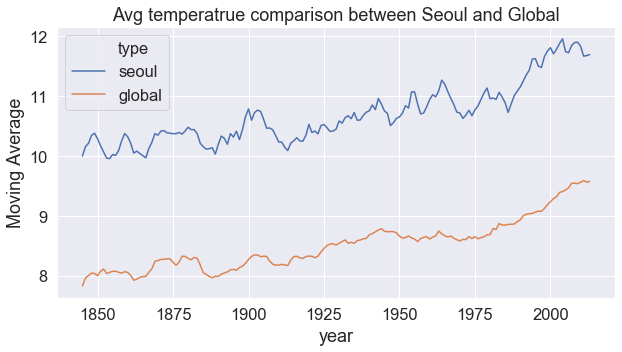

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# use whitegrid style in the graph
sns.set_style('whitegrid')
sns.set(font_scale=1.5)

# use seaborn lineplot
plt1, ax1 = plt.subplots(figsize=(10,5))
sns.lineplot(data = total, x='year', y='MA', hue='type').set(ylabel='Moving Average',
                                                            title='Avg temperatrue comparison between Seoul and Global')


## Observation

### My city Seoul is hotter on average compared to the global average. This is consistent over the whole period. This conclusion may have occurred from the fact that  there are more countries with low temperature around the world.

<br/>

### More 'up and down' and 'bump-like' shapes are observed in the graph of seoul and smoother shape of line is observed in the graph of global.

<br/>

### In overall, both Seoul and global showed the gradual increase in the average temperature. And the average temperature increase is getting bigger and bigger as time goes by (as it gets closer to the modern times)

<br/>

### Both Seoul and the World are getting hotter and hotter as the average temperature is keep increasing for both cases. Thus, the overall trend

<br/>

### it does not apply for the whole period, but the graphs of Seoul and Global tend to follow the similar trend such that when the average temperature of Seoul goes down, that of Global also goes down.